In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

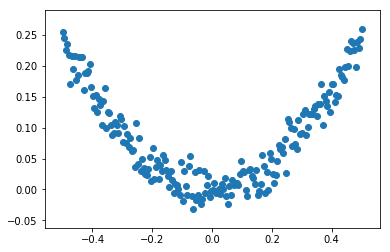

In [8]:
# numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

plt.scatter(x_data,y_data)
plt.show()

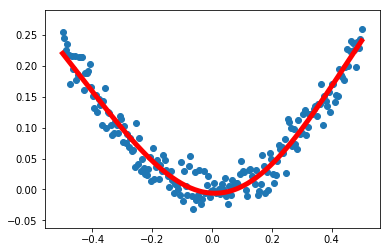

In [9]:
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 神经网络结构：1-20-1
w1 = tf.Variable(tf.random_normal([1,20]))
b1 = tf.Variable(tf.zeros([20]))
wx_plus_b_1 = tf.matmul(x,w1) + b1
l1 = tf.nn.tanh(wx_plus_b_1)

w2 = tf.Variable(tf.random_normal([20,1]))
b2 = tf.Variable(tf.zeros([1]))
wx_plus_b_2 = tf.matmul(l1,w2) + b2
prediction = tf.nn.tanh(wx_plus_b_2)

# 二次代价函数
loss = tf.losses.mean_squared_error(y,prediction)
# 使用梯度下降法最小化loss
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        sess.run(train,feed_dict={x:x_data,y:y_data})
    # 获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    # 画图
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

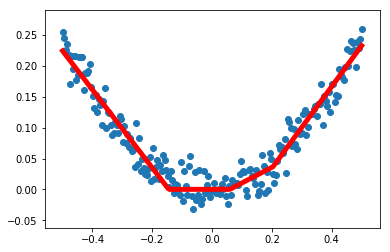

In [11]:
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 神经网络结构：1-20-1
w1 = tf.Variable(tf.random_normal([1,20]))
b1 = tf.Variable(tf.zeros([20]))
wx_plus_b_1 = tf.matmul(x,w1) + b1
l1 = tf.nn.relu(wx_plus_b_1)

w2 = tf.Variable(tf.random_normal([20,1]))
b2 = tf.Variable(tf.zeros([1]))
wx_plus_b_2 = tf.matmul(l1,w2) + b2
prediction = tf.nn.relu(wx_plus_b_2)

# 二次代价函数
loss = tf.losses.mean_squared_error(y,prediction)
# 使用梯度下降法最小化loss
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        sess.run(train,feed_dict={x:x_data,y:y_data})
    # 获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    # 画图
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()